##### Ensemble

- 일반화에서 강건성을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
- 앙상블에는 크게 두가지 종류가 존재함

    - **<span style = "color:pink"> 평균 방법</span>**
        - 여러개의 추정값을 독립적으로 구한뒤 평균을 취함

        - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임

    - **<span style = "color:pink"> 부스팅 방법 </span>**
        - 순차적으로 모델 생성

        - 결합된 모델의 편향을 감소 시키기 위해 노력
        
        - 부스팅 방법의 목표는 **<span style = "color:pink">여러개의 약한 모델들을 결합해 하나의 강력한 모델을 구축하는 것</span>**


##### Bagging meta-estimator

- bagging은 bootstrap aggregating의 줄임말

- 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련

- 각각의 결과를 결합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- **<span style="color:pink">강력하고 복잡한 모델에서 잘 동작함</span>**

In [32]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate

# Classification module

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Regressiong module

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

##### Bagging 을 사용한 분류

In [33]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
diabetes = load_diabetes()

In [11]:
# KNN

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val=cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean()} (+/- {cross_val["fit_time"].std()})')
print(f'avg score time :{cross_val["score_time"].mean()} (+/- {cross_val["score_time"].std()})')
print(f'avg test score :{cross_val["test_score"].mean()} (+/- {cross_val["test_score"].std()})')

avg fit time :0.0009996414184570313 (+/- 8.313939940530154e-07)
avg score time :0.0019997596740722657 (+/- 7.168434323488669e-07)
avg test score :0.96 (+/- 0.024944382578492935)


In [14]:
# wine data

# KNN

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val=cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0134 (+/- 0.0022)
avg score time :0.0059 (+/- 0.0011)
avg test score :0.9498 (+/- 0.0323)


In [15]:
# breast_cancer data

# KNN

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val=cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0126 (+/- 0.0008)
avg score time :0.0084 (+/- 0.0004)
avg test score :0.9648 (+/- 0.0125)


##### SVC

In [16]:
# iris data

base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val=cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0161 (+/- 0.0020)
avg score time :0.0036 (+/- 0.0005)
avg test score :0.9533 (+/- 0.0163)


In [17]:
# wine data

base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val=cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0152 (+/- 0.0020)
avg score time :0.0034 (+/- 0.0004)
avg test score :0.9611 (+/- 0.0333)


In [18]:
# breast cancer data

base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val=cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5,
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0207 (+/- 0.0011)
avg score time :0.0072 (+/- 0.0002)
avg test score :0.9613 (+/- 0.0181)


##### Decision Tree

In [27]:
# Decision Tree iris

base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')

base model avg fit time :0.0010 (+/- 0.0006)
base model avg score time :0.0002 (+/- 0.0004)
base model avg test score :0.9600 (+/- 0.0327)
--------------------------------------------------
bagging model avg fit time :0.0128 (+/- 0.0007)
bagging model avg score time :0.0023 (+/- 0.0004)
bagging model avg test score :0.9400 (+/- 0.0389)


In [30]:
# wine data

# Decision Tree iris

base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')

base model avg fit time :0.0020 (+/- 0.0006)
base model avg score time :0.0002 (+/- 0.0004)
base model avg test score :0.8876 (+/- 0.0499)
--------------------------------------------------
bagging model avg fit time :0.0157 (+/- 0.0019)
bagging model avg score time :0.0032 (+/- 0.0008)
bagging model avg test score :0.8937 (+/- 0.0770)


In [31]:
# Decision Tree cancer

base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')

base model avg fit time :0.0070 (+/- 0.0003)
base model avg score time :0.0007 (+/- 0.0004)
base model avg test score :0.9209 (+/- 0.0202)
--------------------------------------------------
bagging model avg fit time :0.0222 (+/- 0.0008)
bagging model avg score time :0.0028 (+/- 0.0005)
bagging model avg test score :0.9490 (+/- 0.0102)


##### Bagging을 사용한 회귀

In [ ]:
# KNeighborsRegressor diabetes

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')

base model avg fit time :0.0014 (+/- 0.0005)
base model avg score time :0.0013 (+/- 0.0004)
base model avg test score :0.3690 (+/- 0.0447)
--------------------------------------------------
bagging model avg fit time :0.0127 (+/- 0.0012)
bagging model avg score time :0.0059 (+/- 0.0007)
bagging model avg test score :0.4177 (+/- 0.0637)


In [45]:
# SVR diabetes

base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')
print('????????????????')

base model avg fit time :0.0042 (+/- 0.0003)
base model avg score time :0.0018 (+/- 0.0004)
base model avg test score :0.1466 (+/- 0.0219)
--------------------------------------------------
bagging model avg fit time :0.0199 (+/- 0.0016)
bagging model avg score time :0.0094 (+/- 0.0005)
bagging model avg test score :0.0766 (+/- 0.0150)
????????????????


In [48]:
# Decision Tree diabetes

base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val_base=cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


cross_val_bagging=cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)


print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')
print('-'*50)
print(f'bagging model avg fit time :{cross_val_bagging["fit_time"].mean():.4f} (+/- {cross_val_bagging["fit_time"].std():.4f})')
print(f'bagging model avg score time :{cross_val_bagging["score_time"].mean():.4f} (+/- {cross_val_bagging["score_time"].std():.4f})')
print(f'bagging model avg test score :{cross_val_bagging["test_score"].mean():.4f} (+/- {cross_val_bagging["test_score"].std():.4f})')
print('????????????????')

base model avg fit time :0.0030 (+/- 0.0001)
base model avg score time :0.0001 (+/- 0.0002)
base model avg test score :-0.1809 (+/- 0.0923)
--------------------------------------------------
bagging model avg fit time :0.0171 (+/- 0.0005)
bagging model avg score time :0.0030 (+/- 0.0003)
bagging model avg test score :0.3442 (+/- 0.0794)
????????????????


##### Forests of Randomized trees

- sklearn.ensemble 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
    - **<span style="color:pink">Random Forest</span>**
    - **<span style="color:pink">Extra-trees</span>**

- 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
- 앙상블 모델의 예측은 각 모델의 평균

In [49]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

##### Random Forest Calssifier

In [50]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [ ]:
# iris data

cross_val_base=cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')

base model avg fit time :0.0565 (+/- 0.0013)
base model avg score time :0.0032 (+/- 0.0004)
base model avg test score :0.9667 (+/- 0.0211)


In [54]:
# wine data

cross_val_base=cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')

base model avg fit time :0.0651 (+/- 0.0018)
base model avg score time :0.0032 (+/- 0.0004)
base model avg test score :0.9778 (+/- 0.0208)


In [55]:
# cancer data

cross_val_base=cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')


base model avg fit time :0.1084 (+/- 0.0056)
base model avg score time :0.0032 (+/- 0.0004)
base model avg test score :0.9649 (+/- 0.0192)


In [57]:
# diabetes data

model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

cross_val_base=cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')


base model avg fit time :0.1473 (+/- 0.0042)
base model avg score time :0.0055 (+/- 0.0005)
base model avg test score :0.4198 (+/- 0.0504)


##### Extremely Randomized Trees Classification

In [59]:
# iris data

model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val_base=cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')


base model avg fit time :0.0501 (+/- 0.0066)
base model avg score time :0.0037 (+/- 0.0004)
base model avg test score :0.9533 (+/- 0.0340)


In [60]:
# wine data

model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val_base=cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')

base model avg fit time :0.0471 (+/- 0.0024)
base model avg score time :0.0040 (+/- 0.0003)
base model avg test score :0.9832 (+/- 0.0223)


In [61]:
# cancer data

model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

cross_val_base=cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')

base model avg fit time :0.0587 (+/- 0.0017)
base model avg score time :0.0042 (+/- 0.0002)
base model avg test score :0.9631 (+/- 0.0210)


##### Extremely Randomized Trees Regression

In [62]:
# diabetes data

model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

cross_val_base=cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)

print(f'base model avg fit time :{cross_val_base["fit_time"].mean():.4f} (+/- {cross_val_base["fit_time"].std():.4f})')
print(f'base model avg score time :{cross_val_base["score_time"].mean():.4f} (+/- {cross_val_base["score_time"].std():.4f})')
print(f'base model avg test score :{cross_val_base["test_score"].mean():.4f} (+/- {cross_val_base["test_score"].std():.4f})')

base model avg fit time :0.0970 (+/- 0.0062)
base model avg score time :0.0057 (+/- 0.0007)
base model avg test score :0.4295 (+/- 0.0266)


In [78]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap

C:\Users\jjong\AppData\Local\Temp\ipykernel_31568\1431344644.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


##### Visualization

In [82]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [93]:
plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

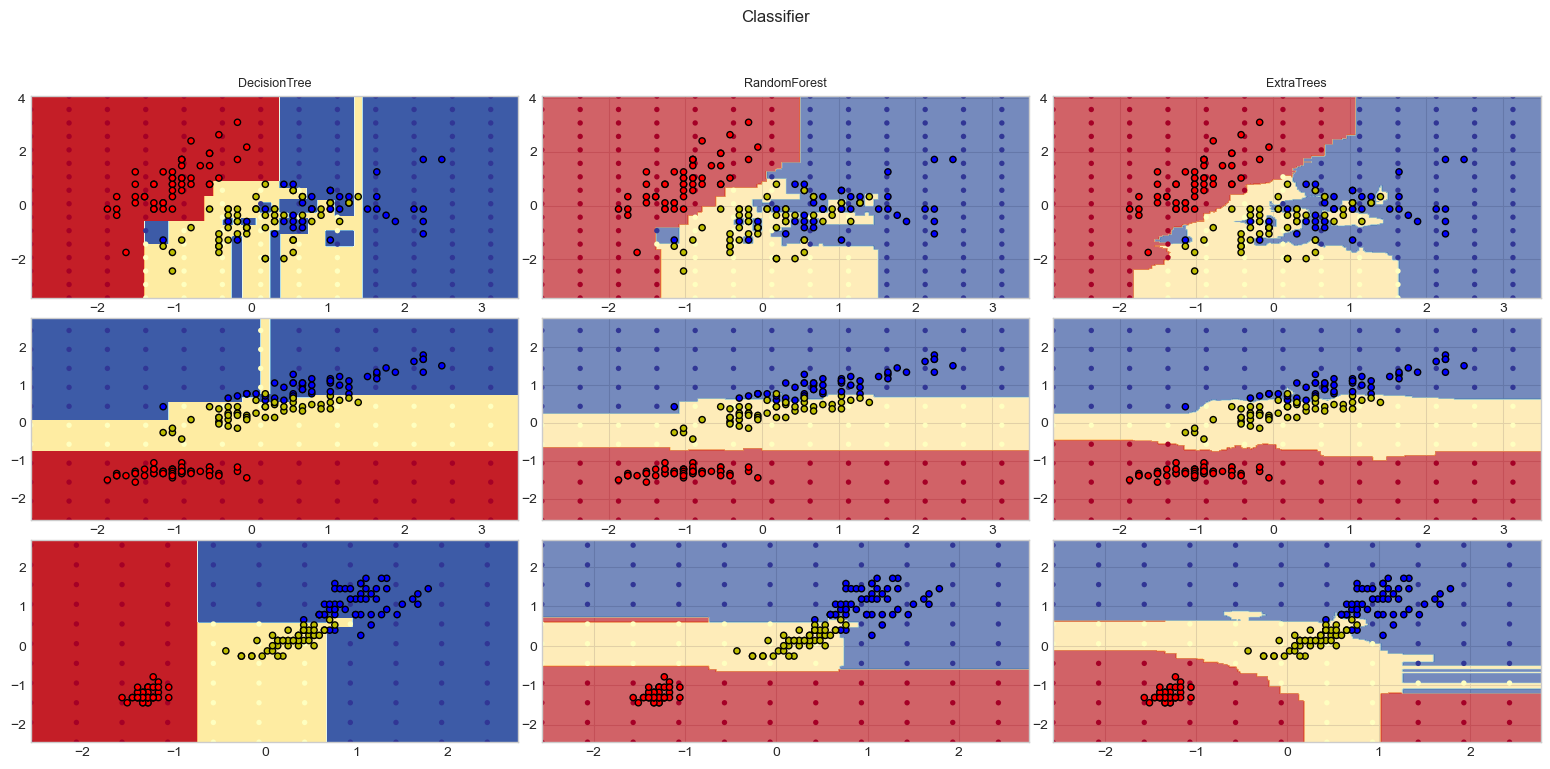

Random Forest가 훨씬 잘 분류한듯


In [94]:
# Visualization

plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):

    for model in models:

        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X -mean) / std

        model.fit(X,y)

        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

        plt.subplot(3, 3, plot_idx)

        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[(xx.ravel(), yy.ravel())])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[(xx.ravel(), yy.ravel())])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=estimator_alpha)

        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors='none')

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r','y','b']), edgecolors='k', s=20)
        plot_idx +=1 

plt.suptitle("Classifier", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

print('Random Forest가 훨씬 잘 분류한듯')

In [95]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

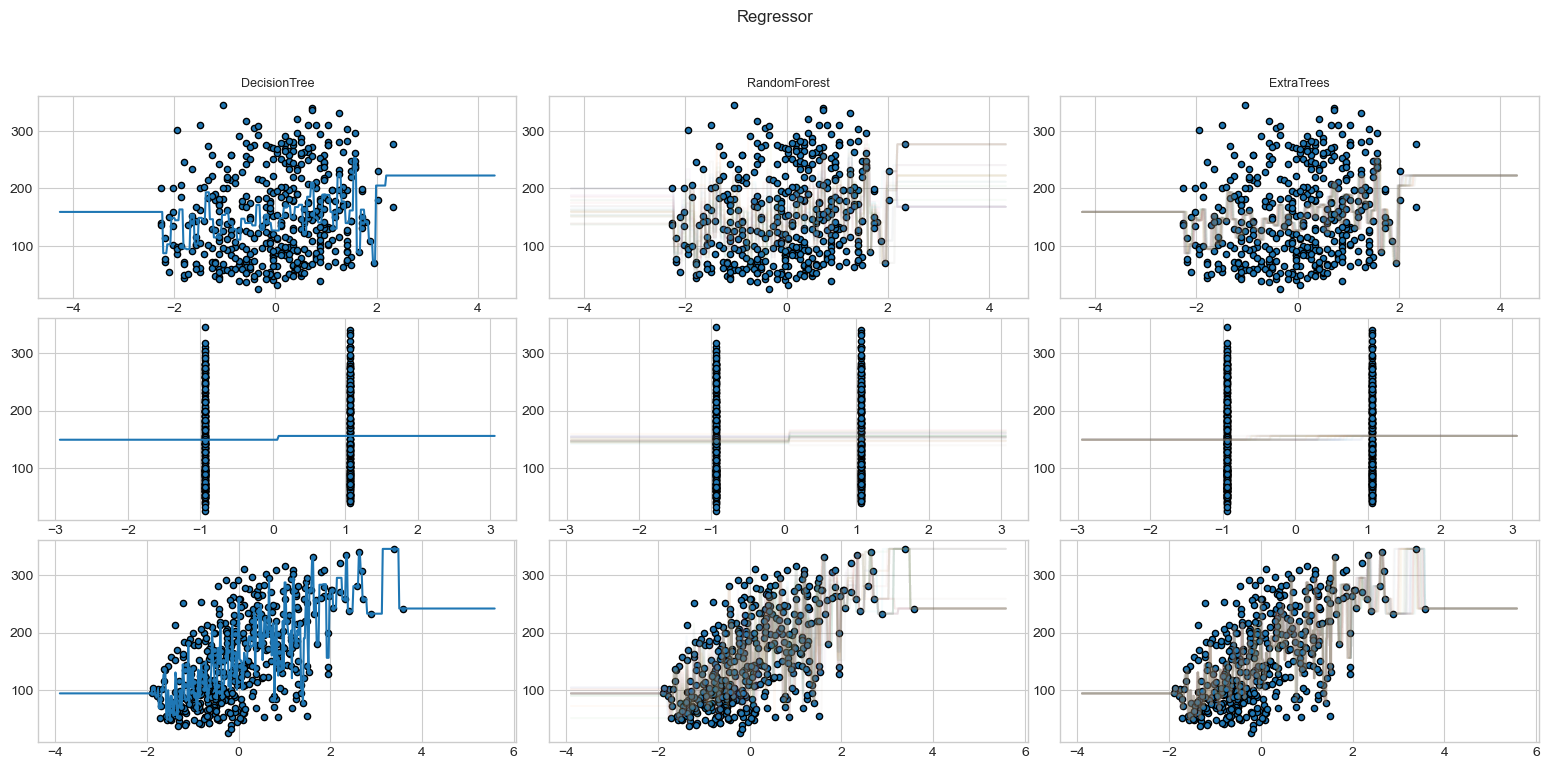

In [102]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):

    for model in models:

        X = diabetes.data[:, pair]
        y = diabetes.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X=X[idx]
        y=y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X-mean)/std

        model.fit(X.reshape(-1,1),y)

        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]

        plt.subplot(3,3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)

        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1

plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

##### **<span style="color:pink"> Ada Boost </span>**

- 대표적인 부스팅 알고리즘

- 일련의 약한 모델들을 학습함

- 수정된 버전의 **<span style="color:pink">가중치가 적용된 데이터를 반복적으로 학습</span>**

- 가중치 투표 혹은 합을 통해 각 모델의 예측 값을 결합

- 첫 단계에서는 raw data를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습함

    - **<span style="color:pink">잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소</span>**
    
    - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨


In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [109]:
# iris data

model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'adaboost model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'adaboost model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'adaboost model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

adaboost model avg fit time :0.0389 (+/- 0.0009)
adaboost model avg score time :0.0044 (+/- 0.0005)
adaboost model avg test score :0.9533 (+/- 0.0340)


In [110]:
# wine data

model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'adaboost model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'adaboost model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'adaboost model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

adaboost model avg fit time :0.0491 (+/- 0.0062)
adaboost model avg score time :0.0049 (+/- 0.0002)
adaboost model avg test score :0.9333 (+/- 0.0624)


##### <span style="color:pink"> Ada Regressor </span>

In [115]:
# diabetes data

model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=4,
)

print(f'adaboost model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'adaboost model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'adaboost model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

adaboost model avg fit time :0.0435 (+/- 0.0161)
adaboost model avg score time :0.0035 (+/- 0.0011)
adaboost model avg test score :0.4317 (+/- 0.0406)


##### **<span style="color:pink"> Gradient Tree Boosting </span>**

- 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘

- 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [116]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [117]:
# iris data

model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
)

print(f'Gradient Tree Boosting model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

Gradient Tree Boosting model avg fit time :0.1347 (+/- 0.0079)
Gradient Tree Boosting model avg score time :0.0012 (+/- 0.0004)
Gradient Tree Boosting model avg test score :0.9667 (+/- 0.0211)


In [118]:
# wine data

model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
)

print(f'Gradient Tree Boosting model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

Gradient Tree Boosting model avg fit time :0.2052 (+/- 0.0082)
Gradient Tree Boosting model avg score time :0.0010 (+/- 0.0000)
Gradient Tree Boosting model avg test score :0.9386 (+/- 0.0321)


In [126]:
# diabetes data

model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
)

print(f'Gradient Tree Boosting model avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'Gradient Tree Boosting model avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

Gradient Tree Boosting model avg fit time :0.0654 (+/- 0.0007)
Gradient Tree Boosting model avg score time :0.0010 (+/- 0.0000)
Gradient Tree Boosting model avg test score :0.4062 (+/- 0.0701)


##### **<span style = "color:pink"> Voting Classifier - 투표 기반 분류 </span>**

- 서로 다른 모델들의 결과를 투표를 통해 결합

    - 가장 많이 예측된 클래스를 정답으로 채택 **<span style = "color:pink"> (hard voting) </span>**

    - 예측된 확률의 가중치 평균 **<span style = "color:pink"> sotf Classifier </span>**

In [129]:
# Classifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [128]:
model1= SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive',model2),('forest',model3)],
    voting='hard'
)

In [139]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, wine.data, wine.target, cv=5)
    print(f'Acc : {scores.mean():.4f}, (+/-{scores.std():.2f}, [model name : {model_name}])')

Acc : 0.6635, (+/-0.05, [model name : SVC])
Acc : 0.9663, (+/-0.02, [model name : GaussianNB])
Acc : 0.9610, (+/-0.02, [model name : RandomForestClassifier])
Acc : 0.9776, (+/-0.02, [model name : VotingClassifier])


In [135]:
model1= SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [138]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, wine.data, wine.target, cv=5)
    print(f'Acc : {scores.mean():.4f}, (+/-{scores.std():.2f}, [model name : {model_name}])')

Acc : 0.6635, (+/-0.05, [model name : SVC])
Acc : 0.9663, (+/-0.02, [model name : GaussianNB])
Acc : 0.9665, (+/-0.02, [model name : RandomForestClassifier])
Acc : 0.9776, (+/-0.02, [model name : VotingClassifier])


##### **<span style = "color:pink"> Voting Regressor - 투표 기반 회귀 </span>**

- 서로 다른 모델의 예측 값의 평균을 사용

In [140]:
# Regressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [141]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators=[('linear',model1), ('gbr',model2), ('rfr',model3)],
    weights=[1,1,1]
)

In [142]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)
    print(f'Acc : {scores.mean():.4f}, (+/-{scores.std():.2f}, [model name : {model_name}])')

Acc : 0.4823, (+/-0.05, [model name : LinearRegression])
Acc : 0.4065, (+/-0.07, [model name : GradientBoostingRegressor])
Acc : 0.4256, (+/-0.05, [model name : RandomForestRegressor])
Acc : 0.4675, (+/-0.05, [model name : VotingRegressor])


##### **<span style="color:pink"> 스택 일반화(Stack Generalization) </span>**

- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

In [143]:
# Stack Regression

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

##### Stack Regression

In [144]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [147]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [148]:
reg

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingregressor',
                 StackingRegressor(estimators=[('ridge', Ridge()),
                                               ('lasso', Lasso()),
                                               ('svr', SVR())],
                                   final_estimator=GradientBoostingRegressor()))])

In [150]:
cross_val = cross_validate(
    estimator=reg,
    X=cancer.data, y=cancer.target,
    cv=5
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.0963 (+/- 0.0062)
avg score time :0.0026 (+/- 0.0005)
avg test score :0.8837 (+/- 0.0683)


##### Stack Classification

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [156]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

In [157]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [158]:
clf

StackingClassifier(estimators=[('logistic', LogisticRegression(max_iter=10000)),
                               ('svc', SVC()), ('naive', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [159]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)

print(f'avg fit time :{cross_val["fit_time"].mean():.4f} (+/- {cross_val["fit_time"].std():.4f})')
print(f'avg score time :{cross_val["score_time"].mean():.4f} (+/- {cross_val["score_time"].std():.4f})')
print(f'avg test score :{cross_val["test_score"].mean():.4f} (+/- {cross_val["test_score"].std():.4f})')

avg fit time :0.1395 (+/- 0.0179)
avg score time :0.0046 (+/- 0.0005)
avg test score :0.9733 (+/- 0.0249)
